In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('IMDB.csv')

# Preprocessing
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
dataset['Episodes'] = dataset['Episodes'].str.extract('(\d+)').astype(float)





In [2]:
# Statistical Depth for imdb dataset
moments = dataset['Rating'].agg(['mean', 'median', 'std', 'skew', 'kurt'])
describe_stats = dataset.describe()

print("Moments:\n", moments)
print("Descriptive Statistics:\n", describe_stats)


Moments:
 mean      8.762400
median    8.700000
std       0.230475
skew      1.123426
kurt      0.781330
Name: Rating, dtype: float64
Descriptive Statistics:
           Episodes      Rating
count   250.000000  250.000000
mean     73.328000    8.762400
std     112.606631    0.230475
min       2.000000    8.400000
25%      14.250000    8.600000
50%      36.000000    8.700000
75%      78.000000    8.900000
max    1076.000000    9.500000


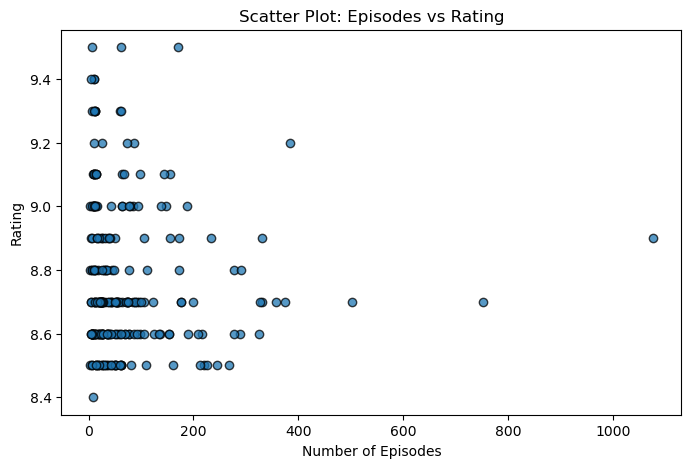

In [3]:
# Relational Graph Function
def plot_relational(data, x, y, title, xlabel, ylabel):
    """
    Code to represent scatter plot to convey an xy relationship.
    
   
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(data[x], data[y], alpha=0.75, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_relational(dataset, 'Episodes', 'Rating', 'Scatter Plot: Episodes vs Rating', 'Number of Episodes', 'Rating')

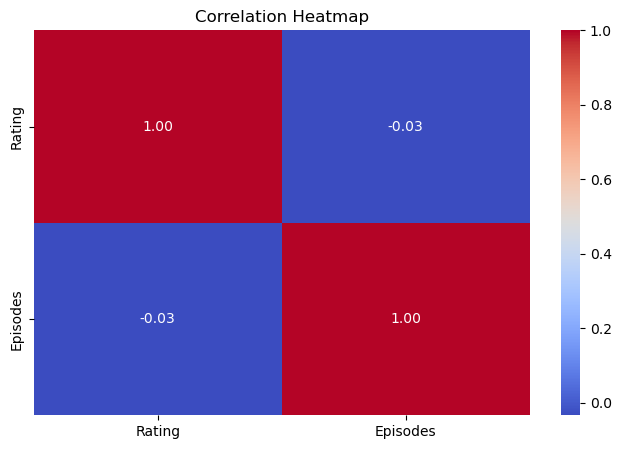

In [4]:
def plot_statistical(matrix, title):
    """
    Creates a heatmap for a statistical relationship.
    
   
    """
    plt.figure(figsize=(8, 5))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()

correlation_matrix = dataset[['Rating', 'Episodes']].corr()
plot_statistical(correlation_matrix, 'Correlation Heatmap')

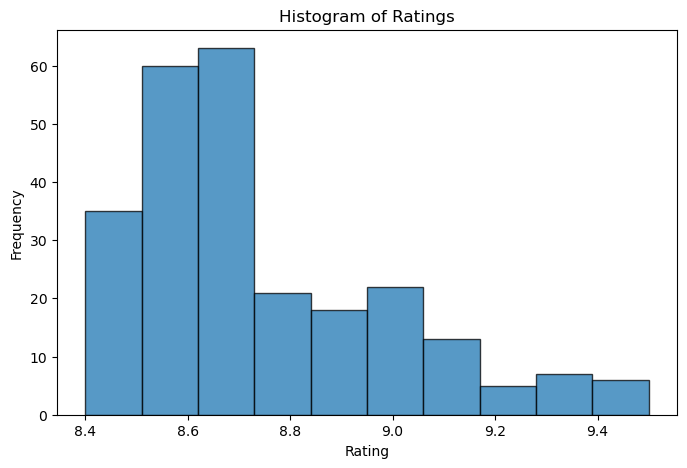

In [5]:
# Categorical Graph Function
def plot_categorical(data, column, title, xlabel, ylabel):
    """
    Creates a histogram to compare multiple categories.
    
    
    """
    plt.figure(figsize=(8, 5))
    plt.hist(data[column].dropna(), bins=10, alpha=0.75, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

plot_categorical(dataset, 'Rating', 'Histogram of Ratings', 'Rating', 'Frequency')


C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

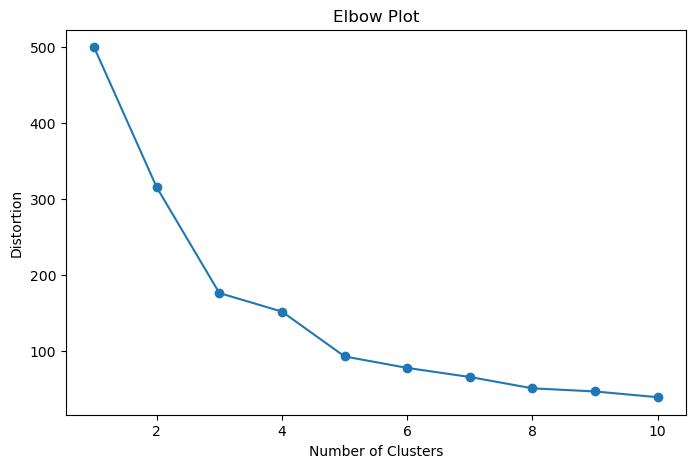

In [6]:
# Clustering Function
def perform_kmeans(data, n_clusters):
    """
    Performs k-means clustering and plots the elbow method.
    
   
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    distortions = []
    for k in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)
    
    # Elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, n_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

    return scaled_data

# Prepare clustering data and generate Elbow Plot
clustering_data = dataset[['Rating', 'Episodes']].dropna()
scaled_clustering_data = perform_kmeans(clustering_data, 10)


C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.56


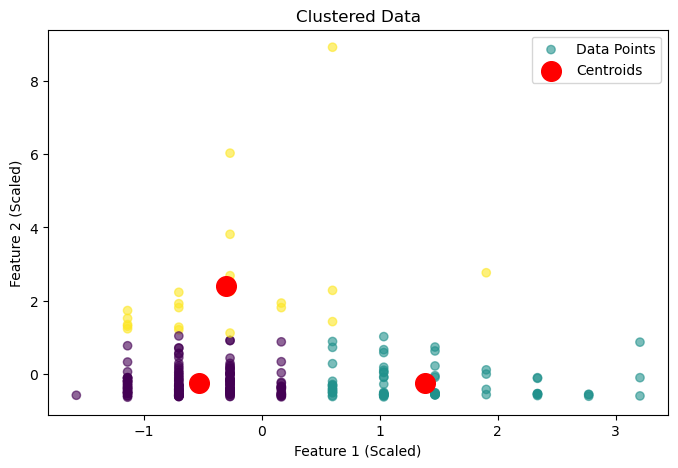

In [6]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
import numpy as np

dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
# Ensure 'Episodes' column is converted to string before using .str methods
dataset['Episodes'] = dataset['Episodes'].astype(str).str.extract('(\d+)').astype(float)


def evaluate_clustering(data, n_clusters):
    """
    Performs k-means clustering with silhouette evaluation.
    Plots cover data with colored groups and centers.

    
    """
    # Normalize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Fit k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Back-scale cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Calculate silhouette score
    silhouette = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score: {silhouette:.2f}")
    
    # Plot clusters
    plt.figure(figsize=(8, 5))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data Points')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.title('Clustered Data')
    plt.xlabel('Feature 1 (Scaled)')
    plt.ylabel('Feature 2 (Scaled)')
    plt.legend()
    plt.show()
    
    return kmeans, labels, centers

# Prepare clustering data
clustering_data = dataset[['Rating', 'Episodes']].dropna()
kmeans_model, cluster_labels, cluster_centers = evaluate_clustering(clustering_data, 3)


C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Silhouette Score: 0.56


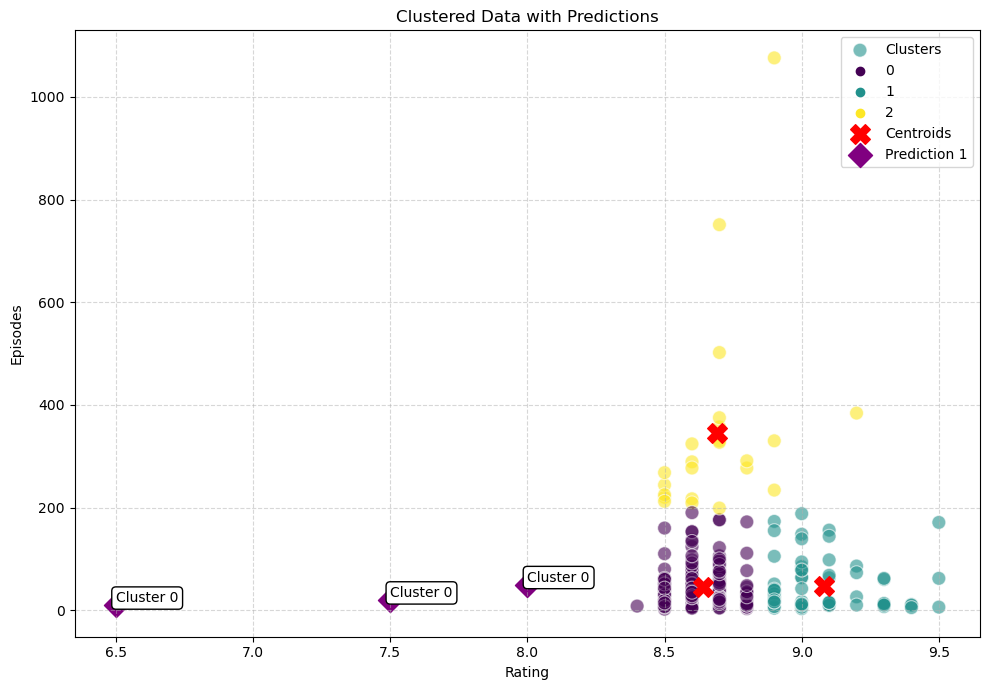

Prediction Point 1: Cluster 0
Prediction Point 2: Cluster 0
Prediction Point 3: Cluster 0


In [9]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Clean and prepare dataset
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
dataset['Episodes'] = dataset['Episodes'].astype(str).str.extract('(\d+)').astype(float)
"""
    showing predicted points and thier cluster groups 
    
"""

def clustering_predictions(data, n_clusters, prediction_points):
    
    
    # Normalize data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # Fit k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Back-scale cluster centers
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Predict new points
    scaled_prediction_points = scaler.transform(prediction_points)
    predictions = kmeans.predict(scaled_prediction_points)
    
    # Calculate silhouette score
    silhouette = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score: {silhouette:.2f}")
    
    # Plot clusters with predictions
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette='viridis', alpha=0.6, s=100, label='Clusters')
    
    # Plot centroids
    plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
    
    # Plot prediction points
    for i, point in enumerate(prediction_points):
        plt.scatter(point[0], point[1], color='purple', s=150, marker='D', label=f'Prediction {i+1}' if i == 0 else "")
        plt.text(
            point[0], point[1], f'Cluster {predictions[i]}', fontsize=10, ha='left', va='bottom', color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )
    
    plt.title('Clustered Data with Predictions')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend()
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    return kmeans, labels, centers, predictions

# Prepare clustering data
clustering_data = dataset[['Rating', 'Episodes']].dropna()

# Define new prediction points
prediction_points = np.array([[7.5, 20], [8.0, 50], [6.5, 10]])

# Evaluate clustering and visualize predictions
kmeans_model, cluster_labels, cluster_centers, predictions = clustering_predictions(
    data=clustering_data,
    n_clusters=3,
    prediction_points=prediction_points
)

# Output predictions
for i, pred in enumerate(predictions):
    print(f"Prediction Point {i+1}: Cluster {pred}")


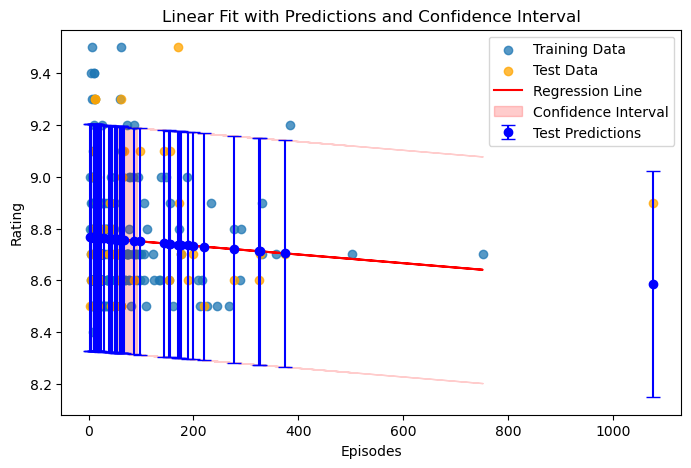

Predicted Ratings for Test Data: [8.7663363  8.75660802 8.76449128 8.74285423 8.71215981 8.72054627
 8.76465901 8.76432356 8.76482674 8.75794985 8.76432356 8.7639881
 8.7351387  8.70410882 8.58653073 8.7663363  8.75677575 8.75560164
 8.74134467 8.75056977 8.75979487 8.74084148 8.76046579 8.76532993
 8.76331718 8.76013033 8.75945941 8.76499447 8.75644029 8.75694348
 8.75660802 8.76415583 8.75778212 8.75845304 8.76532993 8.75945941
 8.7651622  8.73010682 8.76667176 8.712663   8.76298172 8.7374869
 8.75979487 8.76365264 8.76499447 8.73832555 8.73362913 8.76197535
 8.75258252 8.73799009]
Uncertainty: 0.4374975686058849


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def fit_data_predictions(data, x, y, test_size=0.2, random_state=42):
    """
    split data into traina d test and perform train and predict sime of train datset labeling xa nd y as episodes and ratings
    """
    # Split data into training and test sets
    X = data[[x]].values
    y_values = data[y].values
    X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=test_size, random_state=random_state)
    
    # Fit model on training data
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    # Calculate residuals and confidence interval on training data
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)
    confidence_interval = 1.96 * std_error  # 95% confidence interval

    # Predictions for test data
    predictions = model.predict(X_test)
    uncertainty = 1.96 * std_error  # Same CI for predictions

    # Plot training data, fit line, and confidence interval
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, alpha=0.75, label='Training Data')
    plt.scatter(X_test, y_test, color='orange', alpha=0.75, label='Test Data')
    plt.plot(X_train, y_pred_train, color='red', label='Regression Line')
    plt.fill_between(X_train.flatten(), y_pred_train - confidence_interval, y_pred_train + confidence_interval,
                     color='red', alpha=0.2, label='Confidence Interval')
    
    # Plot test predictions with error bars
    plt.errorbar(X_test.flatten(), predictions, yerr=uncertainty, fmt='o', capsize=5, color='blue', label='Test Predictions')
    
    plt.title('Linear Fit with Predictions and Confidence Interval')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

    return predictions, uncertainty

# Use the function to fit, split, and predict
predicted_ratings, uncertainty = fit_data_predictions(
    dataset, 
    x='Episodes', 
    y='Rating'
)


print("Predicted Ratings for Test Data:", predicted_ratings)
print("Uncertainty:", uncertainty)
